In [1]:
%pylab inline
%matplotlib inline
from astropy.io import fits

mpl.rcParams['figure.figsize'] = [7.0, 6.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

Populating the interactive namespace from numpy and matplotlib


## Looking at the final images

/Users/sumits2k/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


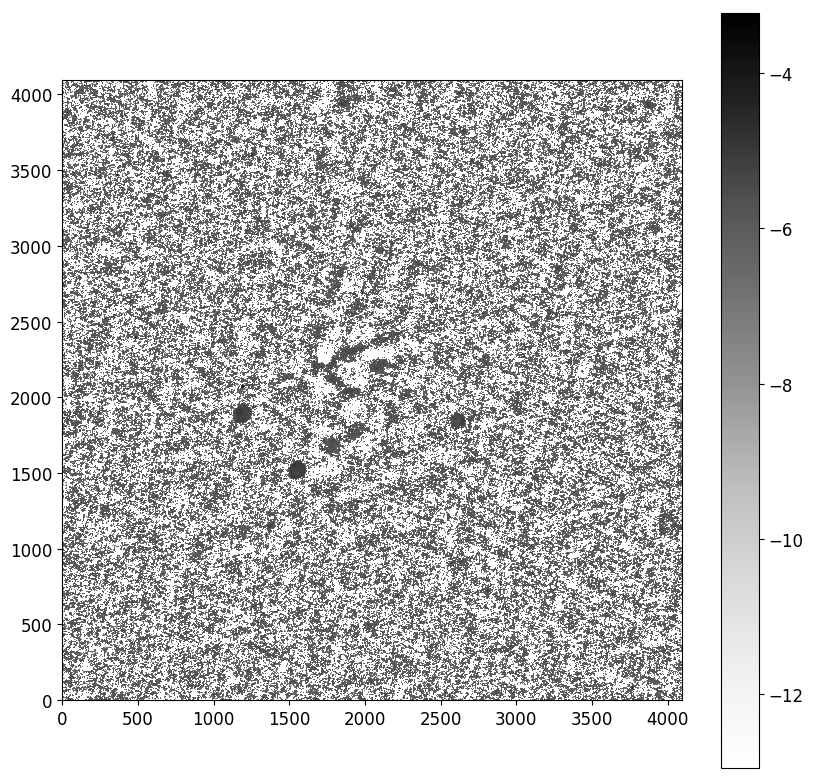

(1, 1, 4096, 4096)


In [2]:
path = '/Users/sumits2k/Dropbox/SN1885a/Images/'
image_file = 'M31_6GHZ_COMB_R5.FITS'
data, header = fits.getdata(path+image_file, 0, header=True)

plt.figure(figsize=(10,10))
plt.imshow(np.log10(data.squeeze()), cmap='Greys', origin='lower')
plt.colorbar()
plt.show()

print data.shape

### Histogram of final 6 GHz image

The mean I was calculating with `np.mean()` wasn't matching up, so I thought looking at the histogram will give a better idea of the RMS noise. The peak should be enough.

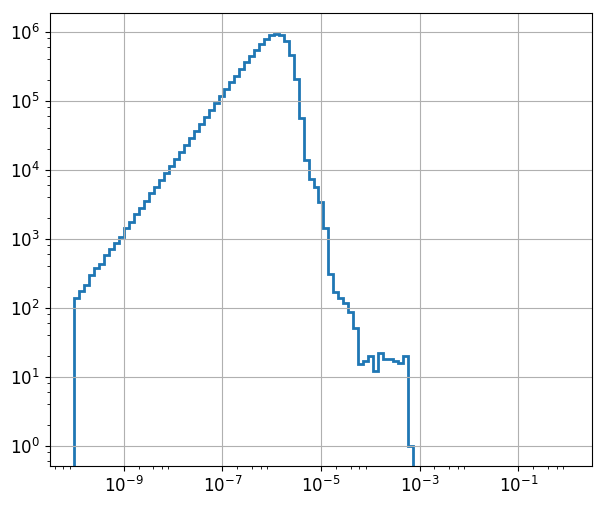

In [8]:
bins=np.logspace(-10, -0, 100)
plt.hist(data.flatten(), bins=bins, histtype='step', lw=2.0)
plt.xscale('log')
plt.yscale('log')
plt.grid()
#plt.xlim(1.0e-12, 1.0e-3)
plt.show()

**A way to remove nan's in data**

In [17]:
no_nan_data = np.log10(data)[~np.isnan(np.log10(data))]
np.mean(np.log10(no_nan_data))

/Users/sumits2k/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


## Making the 2-panel Image

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
INFO: Auto-setting v

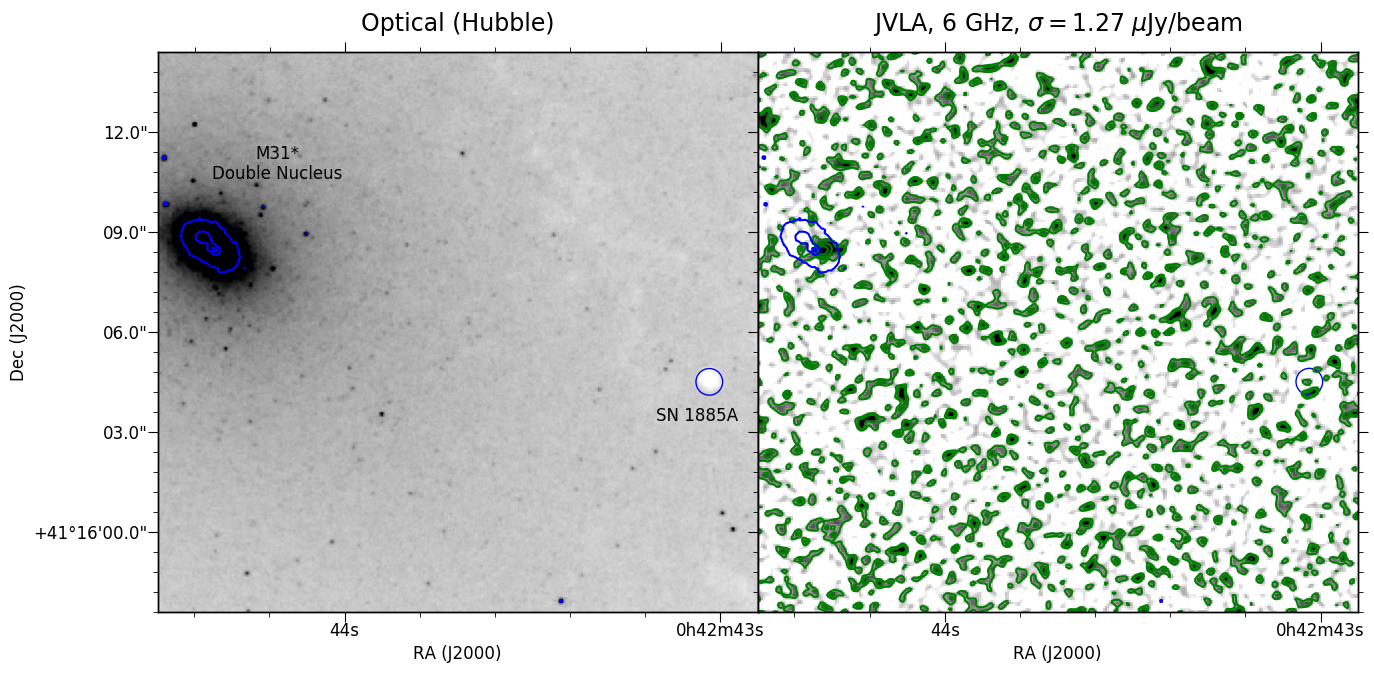

In [11]:
import aplpy
from astropy.units import cds
from astropy.coordinates import Angle

path = '/Users/sumits2k/Dropbox/SN1885a/Images/'

#~~~~~~~~ Recenter units ~~~~~~~~~#
imageCen_RA = Angle('00h42m43.7s').degree
imageCen_Dec = Angle('41d16m06s').degree
image_width = (18.0*cds.arcs).to('deg').value
image_height = (14.0*cds.arcs).to('deg').value
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

#~~~~~~~ SN1885A center ~~~~~~~~~~#
sn1885Cen_RA = Angle('00h42m43.03s').degree
sn1885Cen_Dec = Angle('41d16m04.5s').degree
sn1885_Rad = (0.4*cds.arcs).to('deg').value
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

fig = plt.figure(figsize=(15, 7))

image_Hubble_file = 'sand_ca2_koords2.fits'
image_Hubble = aplpy.FITSFigure(path+image_Hubble_file, figure=fig, subplot=[0.1, 0.1, 0.4, 0.8])
image_Hubble.show_grayscale(stretch='linear')
image_Hubble.recenter(imageCen_RA, imageCen_Dec, width=image_width, height=image_height)
image_Hubble.show_circles(sn1885Cen_RA, sn1885Cen_Dec, radius=sn1885_Rad, edgecolor='b', facecolor='')
image_Hubble.show_contour(levels=[0.1, 0.2, 0.3, 0.4], colors='b', stretch='log')
image_Hubble.add_label(0.2, 0.8, 'M31*\nDouble Nucleus', relative=True)
image_Hubble.add_label(0.9, 0.35, 'SN 1885A', relative=True)
image_Hubble.add_label(0.5, 1.05, 'Optical (Hubble)', relative=True, size=17)
#image_Hubble.add_colorbar('top')
image_Hubble.tick_labels.set_xformat('hh:mm:ss')
image_Hubble.set_theme('publication')


image_6GHz_file = 'M31_6GHZ_COMB_R0.FITS'
image_6GHz = aplpy.FITSFigure(path+image_6GHz_file, figure=fig, subplot=[0.5, 0.1, 0.4, 0.8])
image_6GHz.show_grayscale(stretch='linear', vmin=0.0)
image_6GHz.recenter(imageCen_RA, imageCen_Dec, width=image_width, height=image_height)
image_6GHz.show_circles(sn1885Cen_RA, sn1885Cen_Dec, radius=sn1885_Rad, edgecolor='b', facecolor='')
sigma = 1.27e-6
image_6GHz.show_contour(levels=[1.5*sigma, 3.0*sigma, 6.0*sigma, 12.0*sigma], colors='g')
image_6GHz.show_contour(path+image_Hubble_file, levels=[0.1, 0.2, 0.3, 0.4], colors='b')
image_6GHz.tick_labels.set_xformat('hh:mm:ss')
image_6GHz.add_label(0.5, 1.05, 'JVLA, 6 GHz, $\sigma=1.27$ $\mu$Jy/beam', relative=True, size=17)
#image_6GHz.add_colorbar('top')
#image_6GHz.colorbar.set_axis_label_text(r'$\mu$Jy')
#image_6GHz.colorbar.set_labels(['1','2','3','4','5'])
image_6GHz.tick_labels.hide_y()
image_6GHz.axis_labels.hide_y()
image_6GHz.set_theme('publication')

fig.canvas.draw()
#fig.savefig('./Diagnostics/SN1885_2Panel_Hubble_6GHz.pdf', dpi=120)

### Zoomed in 

In [ ]:
import aplpy
from astropy.units import cds
from astropy.coordinates import Angle

path = '/Users/sumits2k/Dropbox/SN1885a/Images/'

#~~~~~~~~ Recenter units ~~~~~~~~~#
imageCen_RA = Angle('00h42m43.03s').degree
imageCen_Dec = Angle('41d16m04.5s').degree
image_width = (2.4*cds.arcs).to('deg').value
image_height = (1.2*cds.arcs).to('deg').value
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

#~~~~~~~ SN1885A center ~~~~~~~~~~#
sn1885Cen_RA = Angle('00h42m43.03s').degree
sn1885Cen_Dec = Angle('41d16m04.5s').degree
sn1885_Rad = (0.4*cds.arcs).to('deg').value
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

fig = plt.figure(figsize=(7, 7))

image_6GHz_file = 'M31_6GHZ_COMB_R0.FITS'
image_6GHz = aplpy.FITSFigure(path+image_6GHz_file, figure=fig, subplot=[0.5, 0.1, 0.4, 0.8])
image_6GHz.show_grayscale(stretch='linear', vmin=0.0)
image_6GHz.recenter(imageCen_RA, imageCen_Dec, width=image_width, height=image_height)
image_6GHz.show_circles(sn1885Cen_RA, sn1885Cen_Dec, radius=sn1885_Rad, edgecolor='b', facecolor='')
sigma = 1.27e-6
image_6GHz.show_contour(levels=[1.5*sigma, 3.0*sigma, 6.0*sigma, 12.0*sigma], colors='g')
image_6GHz.tick_labels.set_xformat('hh:mm:ss')
image_6GHz.add_label(0.5, 1.05, 'JVLA, zoomed-in', relative=True, size=17)
#image_6GHz.add_colorbar('top')
#image_6GHz.colorbar.set_axis_label_text(r'$\mu$Jy')
#image_6GHz.colorbar.set_labels(['1','2','3','4','5'])
image_6GHz.tick_labels.hide_y()
image_6GHz.axis_labels.hide_y()
image_6GHz.set_theme('publication')

plt.show()

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmax to  5.540e-06 [aplpy.core]
